C:\Users\Shubham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(
C:\Users\Shubham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(
C:\Users\Shubham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(
C:\Users\Shubham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory lea

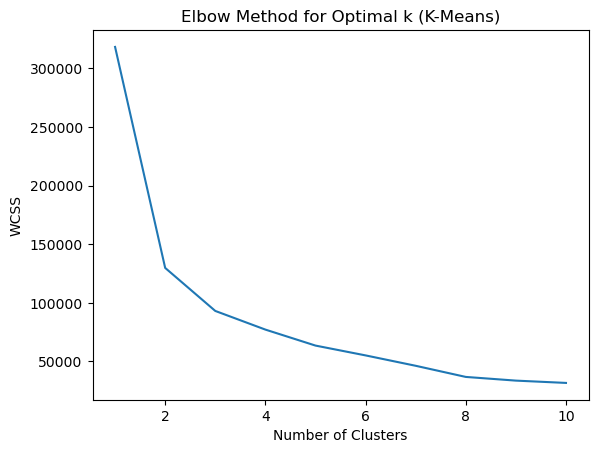

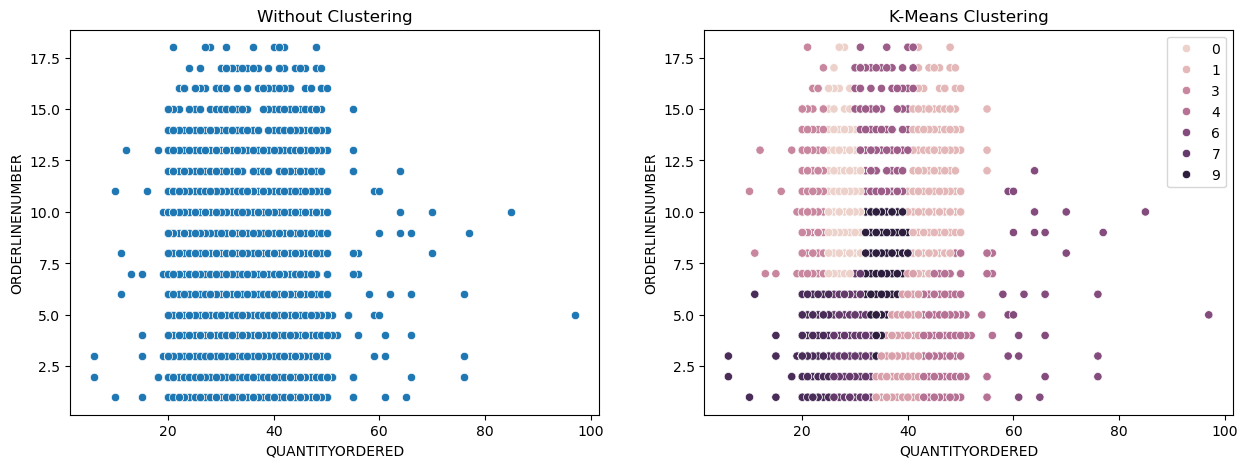

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Load dataset
df = pd.read_csv('sales_data_sample.csv', encoding='latin1')
df = df[['QUANTITYORDERED', 'ORDERLINENUMBER']].dropna()

# K-Means Clustering with Elbow Method
wcss = []
for i in range(1, 11):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(df)
    wcss.append(clustering.inertia_)

# Plot Elbow Method for K-Means
ks = list(range(1, 11))
sns.lineplot(x=ks, y=wcss)
plt.title('Elbow Method for Optimal k (K-Means)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Plot K-Means Clustering Results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.scatterplot(ax=axes[0], data=df, x='QUANTITYORDERED', y='ORDERLINENUMBER').set_title('Without Clustering')
sns.scatterplot(ax=axes[1], data=df, x='QUANTITYORDERED', y='ORDERLINENUMBER', hue=clustering.labels_).set_title('K-Means Clustering')
plt.show()



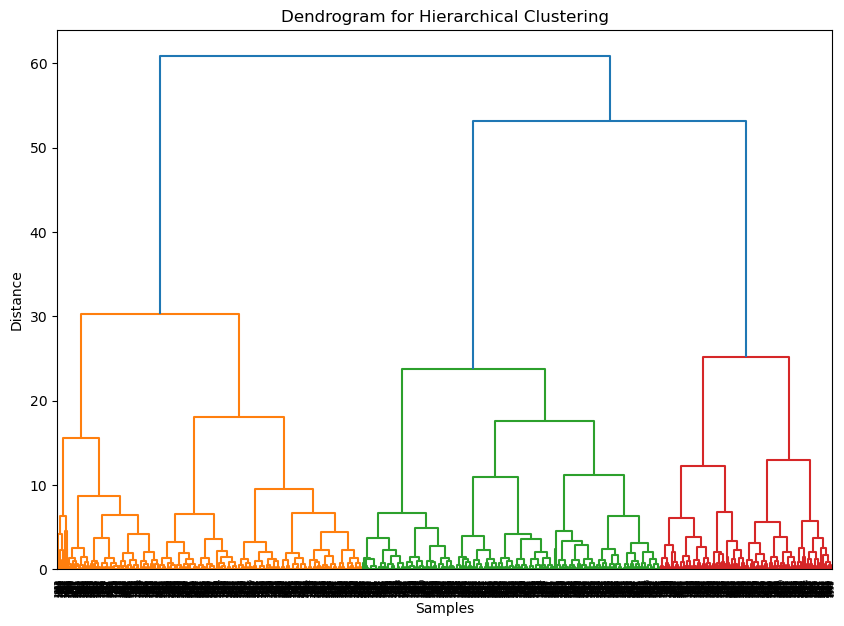

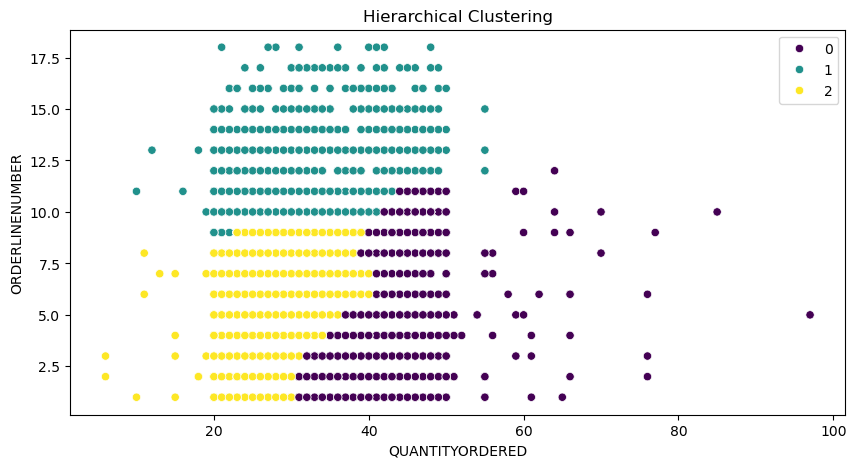

In [2]:
# Scaling data for hierarchical clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Hierarchical Clustering - Dendrogram
plt.figure(figsize=(10, 7))
linked = linkage(scaled_data, method='ward')
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Apply Agglomerative Clustering based on optimal clusters found from dendrogram
hc = AgglomerativeClustering(n_clusters=3, linkage='ward', metric='euclidean')
hc_labels = hc.fit_predict(scaled_data)

# Plot Agglomerative Clustering Results
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='QUANTITYORDERED', y='ORDERLINENUMBER', hue=hc_labels, palette="viridis").set_title('Hierarchical Clustering')
plt.show()